# Image Classification with Keras

In [ ]:
import tensorflow as tf

# Loading Dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Data Preprocessing

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [ ]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Ankle boot'

#Modeling

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.06289439, -0.04692959,  0.0528551 , ..., -0.02063239,
         0.01951737, -0.02631843],
       [-0.06903721, -0.06568455, -0.03906401, ...,  0.07302679,
        -0.04208592,  0.05439059],
       [-0.02190606, -0.05081407,  0.00902523, ...,  0.00875244,
        -0.01108527,  0.06836887],
       ...,
       [-0.01916545,  0.06969522,  0.04721475, ..., -0.00150057,
         0.05928464,  0.03610313],
       [ 0.01732479, -0.0475333 , -0.05330248, ..., -0.03352116,
        -0.03903133,  0.00785265],
       [-0.02276586, -0.02371317,  0.05915888, ...,  0.04667468,
        -0.05148886,  0.04071529]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)

#Training

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.7062 - accuracy: 0.7677 - val_loss: 0.5082 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4890 - accuracy: 0.8297 - val_loss: 0.4621 - val_accuracy: 0.8366
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4441 - accuracy: 0.8434 - val_loss: 0.4296 - val_accuracy: 0.8484
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4195 - accuracy: 0.8527 - val_loss: 0.4013 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3981 - accuracy: 0.8607 - val_loss: 0.3940 - val_accuracy: 0.8586
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3818 - accuracy: 0.8663 - val_loss: 0.4007 - val_accuracy: 0.8618
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3688 - accuracy: 0.8699 - val_loss: 0.3735 - val_accuracy

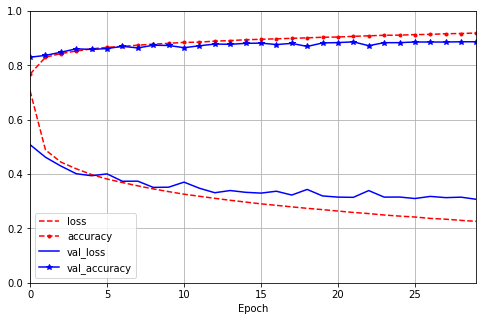

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5),
                                   xlim=[0,29],
                                   ylim=[0,1],
                                   grid= True,
                                   xlabel= "Epoch",
                                   style = ["r--","r--.","b-","b-*"])
plt.show()

# Model Evaluation

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8848


[0.32611843943595886, 0.8848000168800354]

# Data Prediction

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 270ms/step


In [ ]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Let's connect [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [Instagram](https://www.instagram.com/tirendazacademy) |[GitHub](http://github.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) | [Kaggle](https://www.kaggle.com/tirendazacademy) 😎